### CSE 544 Final Project with LA 1997 ~ 2022 Dataset
Ayush Jain 115117851 <br>
Thejesh Venkata Arumalla 114963271<br>
Dukyoung Eom 111309287 <br>
Woohyung Lee 110929853

# Imports

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import random
from scipy.stats import norm, ttest_ind
from scipy.stats import t, norm
import math
import matplotlib.pyplot as plt
from scipy import stats
import os
import sys
import seaborn as sns
from scipy.stats import skewnorm, shapiro

## Utility Functions

In [2]:
def getOriginalDataset():
    return pd.read_csv("Los_Angeles_Long_Beach_Anaheim_2.csv")
def print_dataframe(df):
    pd.set_option('display.max_columns', None)
    pd.set_option('display.expand_frame_repr', False)
    pd.set_option('display.max_rows', None)
    pd.set_option('display.width', None)
    pd.set_option('display.max_colwidth', None)
    #print(df)
    display(df)

In [3]:
df = getOriginalDataset()
df['DATE'] = pd.to_datetime(df['DATE'])
print_dataframe (df)

,DATE,CPI_all_items,Rent_of_Primary_residence,Monthly_Housing_Cost,CPI_Energy,US_Dollar_Purchasing_power
0,1997-01-01,159.400,158.400,155.400,113.800,62.8
1,1997-02-01,159.700,158.700,155.600,114.700,62.6
2,1997-03-01,159.800,158.500,155.500,117.400,62.5
3,1997-04-01,159.900,158.800,155.200,120.200,62.4
4,1997-05-01,159.900,159.100,156.100,121.200,62.5
5,1997-06-01,160.200,159.300,156.400,120.600,62.4
6,1997-07-01,160.400,159.500,156.900,119.700,62.3
7,1997-08-01,160.800,159.700,156.700,122.700,62.2
8,1997-09-01,161.200,160.400,157.100,126.600,62.0
9,1997-10-01,161.500,160.600,157.900,125.800,61.9


# Task 3.1

**1. Outlier Detection**

By using the Tukey’s rule ,we detect the outlier and delete it.  

Tukey’s rule ([Reference](https://www.linkedin.com/pulse/outlier-treatment-tukeys-method-r-swanand-marathe/)
) :

Divide the data set into Quartiles:

* Q1 (the 1st quartile): 25% of the data are less than or equal to this value

* Q3 (the 3rd quartile): 25% of the data are greater than or equal to this value

* IQR (the interquartile range): the distance between Q3 – Q1, it contains the middle 50% of the data

Lower Range = Q1 – (Alpha * IQR)

Upper Range = Q3 + (Alpha * IQR)


**Note**

1. Since there were zero outliers, we reduced the value of alpha from 1.5 to 1.0.(As instruted on [Piazza](https://piazza.com/class/lcuo750nulb47q/post/141))
2.I thought deleting rows with outliers would cause a lot of data loss, so I deleted only the elements with outliers.

In [4]:
# Task 3.1 
# reduce aplha 1.5 => 1

def find_outliers(df, column_name, alpha=1,debug=True):

    column_df = df[column_name]
     # caculate IQR and range by using Tukey’s rule
    Q1 = column_df.quantile(0.25)
    Q3 = column_df.quantile(0.75)
    IQR  = Q3 -Q1 
    
    low_range = Q1 - IQR * alpha
    upper_range = Q3 +  IQR * alpha

     # get a outliers by using the range
    outliers = pd.DataFrame(columns=df.columns)
    print ()
    for _, r in df.iterrows():
        if r[column_name] < low_range or r[column_name] > upper_range:
            outliers = pd.concat([outliers, r.to_frame().T])

    # delete outliers 
    temp_df = df[[column_name]].copy()
    temp_df.drop(outliers.index, inplace=True)
    df[column_name] = temp_df[column_name]
    select_df = outliers[['DATE', column_name]]

   # print result
    if debug:
        print(f"Column_name:{column_name}")
        print(f"Q1:{Q1},Q3:{Q3},IQR:{IQR}")
        print(f"Low_range:{low_range}, Upper_range:{upper_range}")
        print(f"The number of outliers which is deleted :  {len(outliers)}")
        print(f"The outliers which is deleted:")
        print()
    if len(outliers) != 0:
        if debug:
            print(select_df)
    print()

    return  outliers


column_list= ['DATE','CPI_all_items', 'Rent_of_Primary_residence',
       'Monthly_Housing_Cost', 'CPI_Energy', 'US_Dollar_Purchasing_power']

for column in column_list:
    outliers = find_outliers(df, column)                           



Column_name:DATE
Q1:2003-06-23 12:00:00,Q3:2016-06-08 12:00:00,IQR:4734 days 00:00:00
Low_range:1990-07-07 12:00:00, Upper_range:2029-05-25 12:00:00
The number of outliers which is deleted :  0
The outliers which is deleted:



Column_name:CPI_all_items
Q1:183.85,Q3:240.13125,IQR:56.28125
Low_range:127.56875, Upper_range:296.4125
The number of outliers which is deleted :  4
The outliers which is deleted:

          DATE CPI_all_items
308 2022-09-01       296.539
309 2022-10-01       297.987
310 2022-11-01       298.598
311 2022-12-01        298.99


Column_name:Rent_of_Primary_residence
Q1:206.0,Q3:327.213,IQR:121.21300000000002
Low_range:84.78699999999998, Upper_range:448.42600000000004
The number of outliers which is deleted :  1
The outliers which is deleted:

          DATE Rent_of_Primary_residence
286 2020-11-01                      40.0


Column_name:Monthly_Housing_Cost
Q1:193.025,Q3:275.6565,IQR:82.63149999999999
Low_range:110.39350000000002, Upper_range:358.288
The number of

**2. Perform linear interpolation of missing data-points** 

By using linear interpolation ,we replace the  missing data-points.  

Linear interpolation:

1. slope = (y2 − y1)/(x2 − x1) 
2. missing value = y1 + slope ∗ (missing value x − x1) 
3. then replace the missing value 




**Note**

1. In linear interpolation, if the first or last row of a column is missing, there can be issues in calculating the interpolation. Therefore, if a missing value is found in the first or last row of the DataFrame, the default values for the first and last row of the column given in the project guidelines are updated.
2.During the linear interpolation process, if there are consecutive missing indices, the index is incremented until there are no missing values, then x2 is obtained, and the slope is calculated. After that, the missing values are updated using the formula from step 2 and the obtained values.

In [5]:
print("print Missing  Dataset")
print_dataframe(df)

print Missing  Dataset


,DATE,CPI_all_items,Rent_of_Primary_residence,Monthly_Housing_Cost,CPI_Energy,US_Dollar_Purchasing_power
0,1997-01-01,159.400,158.400,155.400,113.800,62.8
1,1997-02-01,159.700,158.700,155.600,114.700,62.6
2,1997-03-01,159.800,158.500,155.500,117.400,62.5
3,1997-04-01,159.900,158.800,155.200,120.200,62.4
4,1997-05-01,159.900,159.100,156.100,121.200,62.5
5,1997-06-01,160.200,159.300,156.400,120.600,62.4
6,1997-07-01,160.400,159.500,156.900,119.700,62.3
7,1997-08-01,160.800,159.700,156.700,122.700,62.2
8,1997-09-01,161.200,160.400,157.100,126.600,62.0
9,1997-10-01,161.500,160.600,157.900,125.800,61.9


This code is used to update the first or last row of a specific column with the default value if it is missing, as mentioned above 

In [6]:
def update_row(df, first_values, last_values,debug=True):
    # get last idx 
    last_idx = len(df) - 1
    for i, column in enumerate(df.columns):
        # Check type of data column 
        if np.issubdtype(df[column].dtype, np.number):
            # check is the first row of the column  is NaN
            if np.isnan(df.loc[0, column]):
                # Update the Nan value as the default first value
                df.loc[0, column] = first_values[i]
                if debug:
                    print(f"We find that the first row for column '{column}' has missing value and updated the  with value {first_values[i]}")
            # check is the last row of the column  is NaN 
            if np.isnan(df.loc[last_idx, column]):
                # Update the Nan value as the default last value
                df.loc[last_idx, column] = last_values[i]
                if debug:
                    print(f"We find that the last row for column '{column}' has missing value and updated the  with value {last_values[i]}")
    

first_values= ['1997-01-01', 159.400 , 164.400, 155.100 , 115.200 , 62.8]
last_values = ['2022-12-01', 298.900, 385.649, 310.725, 287.176, 33.7]

update_row(df, first_values, last_values)

We find that the last row for column 'CPI_all_items' has missing value and updated the  with value 298.9


This is code for the linear interpolation

In [7]:
# Task 3.2 

def linear_interpolation(df,debug=True):
    missing_values = df.isna()
    for column in missing_values.columns:
        if debug:
            print(f"Column '{column}':")

        # find the missing values
        missing_rows = missing_values[column][missing_values[column]]
        for index in missing_rows.index:

            # If the index is alread updated skip the the column
            if not np.isnan(df.loc[index, column]):
                continue

             # find x1 get for the formula , x2 is not decided because they may be nan
            left_index  = index -1
            left_val= df.loc[left_index, column]

            right_index =index+1
            right_val =df.loc[right_index, column]
            roop = True

            # find x2 get for the formula 
            while roop:
                if not np.isnan(right_val): 
                    roop = False
                else : 
                    right_index =right_index+1
                    right_val =df.loc[right_index, column]
           # step1 for the formula  
            slope = (right_val - left_val) / (right_index - left_index)

            # the missing values are updated using the formula from step 2 and the obtained values.
            while index <  right_index:
                # step2 for the formula  
                missing_value = left_val + slope * (index - left_index)
                df.loc[index, column] = missing_value
                if debug:
                    print(f"    - Find Missing value at index {index} and Replace the Missing value to {missing_value}")
                index+= 1
                
            
linear_interpolation(df)


print()
print("print Completed  Dataset")
print_dataframe(df)


Column 'DATE':
Column 'CPI_all_items':
    - Find Missing value at index 308 and Replace the Missing value to 296.215
    - Find Missing value at index 309 and Replace the Missing value to 297.11
    - Find Missing value at index 310 and Replace the Missing value to 298.005
Column 'Rent_of_Primary_residence':
    - Find Missing value at index 257 and Replace the Missing value to 358.4205
    - Find Missing value at index 269 and Replace the Missing value to 370.46900000000005
    - Find Missing value at index 273 and Replace the Missing value to 374.8265
    - Find Missing value at index 286 and Replace the Missing value to 384.03499999999997
Column 'Monthly_Housing_Cost':
    - Find Missing value at index 258 and Replace the Missing value to 299.297
    - Find Missing value at index 262 and Replace the Missing value to 300.81399999999996
Column 'CPI_Energy':
    - Find Missing value at index 268 and Replace the Missing value to 257.8195
    - Find Missing value at index 273 and Replac

,DATE,CPI_all_items,Rent_of_Primary_residence,Monthly_Housing_Cost,CPI_Energy,US_Dollar_Purchasing_power
0,1997-01-01,159.400,158.4000,155.400,113.8000,62.8
1,1997-02-01,159.700,158.7000,155.600,114.7000,62.6
2,1997-03-01,159.800,158.5000,155.500,117.4000,62.5
3,1997-04-01,159.900,158.8000,155.200,120.2000,62.4
4,1997-05-01,159.900,159.1000,156.100,121.2000,62.5
5,1997-06-01,160.200,159.3000,156.400,120.6000,62.4
6,1997-07-01,160.400,159.5000,156.900,119.7000,62.3
7,1997-08-01,160.800,159.7000,156.700,122.7000,62.2
8,1997-09-01,161.200,160.4000,157.100,126.6000,62.0
9,1997-10-01,161.500,160.6000,157.900,125.8000,61.9


### This function gives the intepolated dataframe for further tasks.

In [8]:
def getInterpolatedDf():
    df = getOriginalDataset()
    df['DATE'] = pd.to_datetime(df['DATE'])
    for column in df.columns:
        outliers = find_outliers(df, column,debug=False)
    first_values= ['1997-01-01', 159.400 , 164.400, 155.100 , 115.200 , 62.8]
    last_values = ['2022-12-01', 298.900, 385.649, 310.725, 287.176, 33.7]

    update_row(df, first_values, last_values,debug = False)
    linear_interpolation(df,debug=False)
    df['year'] = df['DATE'].dt.year
    df['month'] = df['DATE'].dt.month
    return df
    
    

**3. Performing Wald’s test, Z-test and t-test** 

By using the Wald’s test, Z-test and t-test,We check whether the null hypothesis is true or not.



### Wald's Test ([Reference](https://www3.cs.stonybrook.edu/~anshul/courses/cse544_s23/lec15.pptx))
Wald's test statistic is calculated as follows:

W = (θ̂ - θ₀) / sqrt(Var(θ̂))

where θ̂ is the estimator, θ₀ is the null hypothesis value, and Var(θ̂) is the variance of the estimator.

### Z-Test([Reference](https://www3.cs.stonybrook.edu/~anshul/courses/cse544_s23/lec17.pptx))
The Z-test statistic is calculated as follows:

Z = (X̄ - μ) / (σ / sqrt(n))

where X̄ is the sample mean, μ is the population mean, σ is the population standard deviation, and n is the sample size.

### T-Test([Reference](https://www3.cs.stonybrook.edu/~anshul/courses/cse544_s23/lec17.pptx))

The t-test statistic is calculated as follows:

t = (X̄ - μ) / (s / sqrt(n))

where X̄ is the sample mean, μ is the population mean, s is the sample standard deviation, and n is the sample size.
### How to get maximum likelihood estimation (MLE) for the Poisson distribution.

Suppose there is X which the number of events occurring in a given time or space and, k is a non-negative integer, and λ is the average event rate.

    * Given a sample data {x1, x2, ..., xn},

    * P(X=k) = (e^(-λ) * λ^k) / k!

    * L(λ) = P(x1, x2, ..., xn | λ) = ∏ P(xi | λ)

    * l(λ) = log L(λ) = ∑ log P(xi | λ)

    * l(λ) = ∑ (-λ + xi * log(λ) - log(xi!))

    * ∂l(λ) / ∂λ = ∑ (-1 + xi / λ) = 0


Solving this equation for λ, we obtain the MLE:
λ_MLE = (x1 + x2 + ... + xn) / n

Therefore, MLE of the the Poisson distribution is mean of sample data 


### How to find the variance of the MLE (λ_MLE) for the Poisson distribution

λ_MLE = sample_mean

That is, λ_MLE is the sample mean. The variance and mean in the Poisson distribution are equal. Therefore, the variance of λ_MLE is as follows:

Var(λ_MLE) = λ_MLE


**Use MLE assume for the estimators purposes that daily data is Poisson distributed**

### Wald's Test for Poisson Distribution (MLE)
Wald's test statistic is calculated as follows:

W = (λ̂₁ - λ̂₂) / sqrt(λ̂₁/n₁ + λ̂₂/n₂)

where λ̂₁ and λ̂₂ are the MLE estimates of the Poisson parameters for samples 1 and 2, and n₁ and n₂ are the sample sizes.

### Z-Test for Poisson Distribution (MLE)
The Z-test statistic is calculated as follows:

Z = (λ̂₁ - λ̂₂) / sqrt(λ̂₁/n₁ + λ̂₂/n₂)

where λ̂₁ and λ̂₂ are the MLE estimates of the Poisson parameters for samples 1 and 2, and n₁ and n₂ are the sample sizes.

### T-Test for Poisson Distribution (MLE)
The t-test statistic is calculated as follows:

t = (λ̂₁ - λ̂₂) / sqrt(λ̂₁/n₁ + λ̂₂/n₂)

where λ̂₁ and λ̂₂ are the MLE estimates of the Poisson parameters for samples 1 and 2, and n₁ and n₂ are the sample sizes.





**Note**

1. We will use MLE for all test; assume for the estimators purposes that daily data is Poisson distributed. 
(As instruted on [Piazza](https://piazza.com/class/lcuo750nulb47q/post/153))
2. To comply with the guidelines, we first extracted the year and month using the DATE column, and then created data frames for the monthly averages of the "Rent_of_Primary_residence" and "CPI_Energy" column values for 2020 and 2021.
3. Using the data frames created above, we performed hypothesis testing to determine whether the monthly averages of "Rent_of_Primary_residence" and "CPI_Energy" for 2020 and 2021 were the same or not.
4. We will perform both one-sided and two-sided tests for the null hypothesis.
5. MLE of Poisson = mean of sample data = lambda   
6. Variance of MLE of Poisson =  lambda
7. we only use from scipy.stats import t, norm libary to get cdf
8. We didn't have a predefined alpha value for the null hypothesis, so we used the commonly accepted value of 0.05.
9. We calculate the p_value by considering the computed estimators, the alpha value, and the type of test (one-sided or two-sided).
10. When the p_value is greater than alpha, we fail to reject the null hypothesis, and when the p_value is less than or equal to alpha, we reject the null hypothesis.

**Before conducting the one-sided or two-sided test, we need a function to create data frames for the monthly mean of a specific feature between 2021 and 2022 (Note 2).**

In [9]:
def get_monthly_mean(df,year, column_name):
    # By using the df['DATE'], extracted the year and month column

    df['year'] = df['DATE'].dt.year
    df['month'] = df['DATE'].dt.month

    # Filter data for year
    df_year = df[df['year'] == year]

    # Calculate monthly mean for each year by using the .groupby
    monthly_mean_year = df_year.groupby('month')[column_name].mean()

    return monthly_mean_year

#### Conducted one side test the Hypothesis for specific columns:
* Null Hypothesis (H0): Mean of column in year1 <= Mean of column in year2
* Alternative Hypothesis (H1): Mean of column in year1 > Mean of column in year2

In [10]:
#step 3.3

def compare_means_one_sided(df, column_name, year1, year2,alpha = 0.05 ):

    # Null Hypothesis (H0): Mean of column in year1 <= Mean of column in year2
    # Alternative Hypothesis (H1): Mean of column in year1 > Mean of column in year2 
    print("This is one side test")
    print(f"Here are the results for the comparison of {column_name}'s mean between {year1} and {year2}")
    print(f"Null Hypothesis (H0): Mean of {column_name} in {year1} <= Mean of {column_name} in {year2}")
    print(f"Alternative Hypothesis (H1): Mean of {column_name} in {year1} > Mean of {column_name} in {year2}") 
    print()

    # Calculate monthly mean for each year
    monthly_mean_year1 = get_monthly_mean(df,year1,column_name)
    monthly_mean_year2 = get_monthly_mean(df,year2,column_name)

    # According to the assumption, we know that the sample data follows a Poisson distribution.
    # As a above note, we know MLE of Poisson = mean of sample data = lambda_hat_data, so
    lambda_hat_x , lambda_hat_y  = monthly_mean_year1.mean(), monthly_mean_year2.mean() 
  
    # Get a number of sample data of two sample 
    n1, n2 = len(monthly_mean_year1), len(monthly_mean_year2)

    # Wald's Test: pls check above formula
    # As a above note, we know variance of MLE of Poisson =  lambda ,so  

    wald_statistic = (lambda_hat_x - lambda_hat_y) / np.sqrt(lambda_hat_x/n1 + lambda_hat_y/n2)
    wald_p_value = 1 - norm.cdf(wald_statistic) 
    print(f"Statistic of Wald's Test:{wald_statistic}")

    # Z-test Test:pls check above formula
    # We realized that  z_statistic is same as wald_p_value

    z_statistic = (lambda_hat_x - lambda_hat_y) / np.sqrt(lambda_hat_x/n1 + lambda_hat_y/n2)
    z_p_value = 1 - norm.cdf(z_statistic)
    print(f"Statistic of Z-test: {z_statistic}")

    # T-test :pls check above formula
    t_statistic = (lambda_hat_x - lambda_hat_y) / np.sqrt(lambda_hat_x/n1 + lambda_hat_y/n2)
    # To use a t.cdf, we cacaluate degrees_of_freedom, below is the code 

    degrees_of_freedom = (((lambda_hat_x / n1) + (lambda_hat_y / n2)) ** 2) / ((((lambda_hat_x) ** 2) / ((n1 ** 2) * (n1 - 1))) + (((lambda_hat_y**2) ** 2)/ ((n2 ** 2) * (n2 - 1))))
    t_p_value = 1 - t.cdf(np.abs(t_statistic), degrees_of_freedom)
    print(f"Statistic of T-test = {t_statistic}")

    print()

    test_names = ["Wald's Test", "Z-test", "T-test"]
    p_values = [wald_p_value, z_p_value, abs(t_p_value)]

    for test_name, p_value in zip(test_names, p_values):
        if p_value > alpha:
            print(f"For {test_name}, P-value of the {test_name}: {p_value} > alpha: {alpha}),so the H0 is not rejected.")
        else:
            print(f"For {test_name}, P-value of the {test_name}: {p_value} <= alpha: {alpha}),so the H0 is rejected.")
        print()

compare_means_one_sided(df, "Rent_of_Primary_residence", 2020, 2021)
compare_means_one_sided(df, "CPI_Energy", 2020, 2021)


This is one side test
Here are the results for the comparison of Rent_of_Primary_residence's mean between 2020 and 2021
Null Hypothesis (H0): Mean of Rent_of_Primary_residence in 2020 <= Mean of Rent_of_Primary_residence in 2021
Alternative Hypothesis (H1): Mean of Rent_of_Primary_residence in 2020 > Mean of Rent_of_Primary_residence in 2021

Statistic of Wald's Test:-0.9567867619485085
Statistic of Z-test: -0.9567867619485085
Statistic of T-test = -0.9567867619485085

For Wald's Test, P-value of the Wald's Test: 0.8306625523350959 > alpha: 0.05),so the H0 is not rejected.

For Z-test, P-value of the Z-test: 0.8306625523350959 > alpha: 0.05),so the H0 is not rejected.

For T-test, P-value of the T-test: 0.4993266351847243 > alpha: 0.05),so the H0 is not rejected.

This is one side test
Here are the results for the comparison of CPI_Energy's mean between 2020 and 2021
Null Hypothesis (H0): Mean of CPI_Energy in 2020 <= Mean of CPI_Energy in 2021
Alternative Hypothesis (H1): Mean of CPI_

#### Conducted two side test the Hypothesis for specific columns:
* Null Hypothesis (H0): Mean of column in year1 = Mean of column in year2
* Alternative Hypothesis (H1): Mean of column in year1 != Mean of column in year2

In [11]:
#step 3.3

def compare_means_two_sided(df, column_name, year1, year2,alpha = 0.05 ):

    # Null Hypothesis (H0): Mean of column in year1 = Mean of column in year2
    # Alternative Hypothesis (H1): Mean of column in year1 != Mean of column in year2 

    print("This is two side test")
    print(f"Here are the results for the comparison of {column_name}'s mean between {year1} and {year2}")
    print(f"Null Hypothesis (H0): Mean of {column_name} in {year1} = Mean of {column_name} in {year2}")
    print(f"Alternative Hypothesis (H1): Mean of {column_name} in {year1} != Mean of {column_name} in {year2}") 
    print()

    # Calculate monthly mean for each year
    monthly_mean_year1 = get_monthly_mean(df,year1,column_name)
    monthly_mean_year2 = get_monthly_mean(df,year2,column_name)

    # According to the assumption, we know that the sample data follows a Poisson distribution.
    # As a above note, we know MLE of Poisson = mean of sample data = lambda_hat_data, so
    lambda_hat_x , lambda_hat_y  = monthly_mean_year1.mean(), monthly_mean_year2.mean() 
  
    # Get a number of sample data of two sample 
    n1, n2 = len(monthly_mean_year1), len(monthly_mean_year2)

    # Wald's Test: pls check above formula
    # As a above note, we know variance of MLE of Poisson =  lambda ,so  

    wald_statistic = (lambda_hat_x - lambda_hat_y) / np.sqrt(lambda_hat_x/n1 + lambda_hat_y/n2)
    wald_p_value = 2*(1 - norm.cdf(wald_statistic))
    print(f"Statistic of Wald's Test:{wald_statistic}")

    # Z-test Test:pls check above formula
    # We realized that  z_statistic is same as wald_p_value

    z_statistic = (lambda_hat_x - lambda_hat_y) / np.sqrt(lambda_hat_x/n1 + lambda_hat_y/n2)
    z_p_value = 2*(1 - norm.cdf(z_statistic))
    print(f"Statistic of Z-test: {z_statistic}")

    # T-test :pls check above formula
    t_statistic = (lambda_hat_x - lambda_hat_y) / np.sqrt(lambda_hat_x/n1 + lambda_hat_y/n2)
    # To use a t.cdf, we cacaluate degrees_of_freedom, below is the code 
    degrees_of_freedom = (((lambda_hat_x / n1) + (lambda_hat_y / n2)) ** 2) / ((((lambda_hat_x) ** 2) / ((n1 ** 2) * (n1 - 1))) + (((lambda_hat_y**2) ** 2)/ ((n2 ** 2) * (n2 - 1))))
    t_p_value = 2*(1 - t.cdf(np.abs(t_statistic), degrees_of_freedom))
    print(f"Statistic of T-test = {t_statistic}")

    print()

    test_names = ["Wald's Test", "Z-test", "T-test"]
    p_values = [wald_p_value, z_p_value, abs(t_p_value)]

    for test_name, p_value in zip(test_names, p_values):
        if p_value > alpha:
            print(f"For {test_name}, P-value of the {test_name}: {p_value} > alpha: {alpha}),so the H0 is not rejected.")
        else:
            print(f"For {test_name}, P-value of the {test_name}: {p_value} <= alpha: {alpha}),so the H0 is rejected.")
        print()

compare_means_two_sided(df, "Rent_of_Primary_residence", 2020, 2021)
compare_means_two_sided(df, "CPI_Energy", 2020, 2021)


This is two side test
Here are the results for the comparison of Rent_of_Primary_residence's mean between 2020 and 2021
Null Hypothesis (H0): Mean of Rent_of_Primary_residence in 2020 = Mean of Rent_of_Primary_residence in 2021
Alternative Hypothesis (H1): Mean of Rent_of_Primary_residence in 2020 != Mean of Rent_of_Primary_residence in 2021

Statistic of Wald's Test:-0.9567867619485085
Statistic of Z-test: -0.9567867619485085
Statistic of T-test = -0.9567867619485085

For Wald's Test, P-value of the Wald's Test: 1.6613251046701918 > alpha: 0.05),so the H0 is not rejected.

For Z-test, P-value of the Z-test: 1.6613251046701918 > alpha: 0.05),so the H0 is not rejected.

For T-test, P-value of the T-test: 0.9986532703694486 > alpha: 0.05),so the H0 is not rejected.

This is two side test
Here are the results for the comparison of CPI_Energy's mean between 2020 and 2021
Null Hypothesis (H0): Mean of CPI_Energy in 2020 = Mean of CPI_Energy in 2021
Alternative Hypothesis (H1): Mean of CPI_E

## Task 3.4  Performing K-S test and Permutation test
For this task, we were asked to infer the equality of distributions between average change over time in the prices paid by urban consumers (CPI_all_items) <br>and the average change over time in the prices
paid by urban consumers for rent of their primary residence (Rent_of_Primary_residence) filtered from 2018 to 2020.<br>
1 Sample K-S test, 2 Sample K-S test, and Permutation test were conducted respectively.<br><br>
For 1 Sample K-S test, we checked whether Rent_of_Primary_residence follows any of Poisson, Geomtric, Binomial distributions, <br>
and MME parameters for the distributions are computed from CPI_all_items.<br><br>
For 2 Sample K-S test and permutation test, we checked whether two samples follow the same distribution. <br>
Percent change was applied as discussed in Piazza (https://piazza.com/class/lcuo750nulb47q/post/150) to the CPI_all_items and Rent_of_Primary_residence columns before the 2 Sample K-S test and permutation test. <br><br>
Threshold was set to 0.05 for all K-S tests and permutation test.

##### For 1 sample K-S Test, it was advised to not use percent change
Thus, we just filtered values from 2018 to 2020

In [12]:
df = getInterpolatedDf()



filtered_df = df[(df['year'] >= 2018) & (df['year'] <= 2020)]

housing_data = filtered_df['CPI_all_items'].values
rent_data = filtered_df['Rent_of_Primary_residence'].values

##### 1 Sample K-S test was introduced in lecture 18, and we implemented it on our own based on the lecture contents.<br>
MMEs are computed as the following: <br>
For Binomial Distribution,<br>
<!-- $$ P(x) = {{n}\choose{x}} p^x(1-p)^{n-x} $$ -->
$$ k = 2 $$
$$ \hat{\alpha_1} = \frac{{\sum_{i=1}^{m} x_i}}{{m}} $$
$$ \hat{\alpha_2} = \frac{{\sum_{i=1}^{m} x_i^2}}{{m}} $$
$$ \hat{\alpha_1} = E(X) $$
$$ \hat{\alpha_2} = E(X^2) $$
$$ E(X) = np $$
$$ \frac{{\sum_{i=1}^{m} x_i}}{{m}} = np $$
$$ \hat{p}_{MME} = \frac{\bar{x}}{n}$$
$$ Var(X) = np(1-p) $$
We know that $$ Var(X) = E(X^2) - E(X)^2 $$
$$ E(X^2) = Var(X) + E(X)^2 $$
$$ E(X^2) = np(1-p) + (np)^2 $$
$$ np(1-p) + (np)^2 = \frac{{\sum_{i=1}^{m} x_i^2}}{{m}} $$
Since we figured out that $$ \hat{p}_{MME} = \frac{\bar{x}}{n}$$
$$ n(\frac{\bar{x}}{n})(1-\frac{\bar{x}}{n}) + (n\frac{\bar{x}}{n})^2 = \frac{{\sum_{i=1}^{m} x_i^2}}{{m}} $$
$$ \bar{x} - \frac{\bar{x}^2}{n} + \bar{x}^2 = \frac{{\sum_{i=1}^{m} x_i^2}}{{m}} $$
$$ \bar{x} - \frac{\bar{x}^2}{n} = \frac{{\sum_{i=1}^{m} x_i^2}}{{m}} - \bar{x}^2 $$
$$ \bar{x} - \frac{\bar{x}^2}{n} = {S_x}^2 $$
$$ \bar{x} - {S_x}^2 = \frac{\bar{x}^2}{n} $$
$$ \frac{1}{\bar{x} - {S_x}^2} = \frac{n}{\bar{x}^2} $$
$$ \frac{\bar{x}^2}{\bar{x} - {S_x}^2} = n $$
$$ \hat{n}_{MME} = \frac{\bar{x}^2}{\bar{x} - {S_x}^2} $$
For Poisson Distribution,<br>
$$ k = 1 $$
$$ \hat{{\alpha_1}} = \frac{{\sum_{i=1}^{n} x_i}}{{n}} $$
$$ E(X) = \lambda $$
$$ \hat{\alpha_1} = E(X) $$
$$ \frac{{\sum_{i=1}^{n} x_i}}{{n}} = \lambda $$
$$ \hat{\lambda}_{MME} = \bar{x} $$
$$ \hat{\lambda}_{MME} = \lambda $$
<!-- $$ P(x) = \frac{{e^{-\lambda} \lambda^x}}{{x!}} $$ -->
For Geometric Distribution,<br>
<!-- $$ P(x) = (1 - p)^{x-1} * p $$ -->
$$ k = 1 $$
$$ \hat{\alpha_1} = \frac{{\sum_{i=1}^{n} x_i}}{{n}} $$
$$ E(X) = \frac{1}{p} $$
$$ \hat{\alpha_1} = E(X) $$
$$ \frac{{\sum_{i=1}^{n} x_i}}{{n}} = \frac{1}{p} $$
$$ \hat{p}_{MME} = \frac{{n}}{{\sum_{i=1}^{n} x_i}} $$
$$ \hat{p}_{MME} = \frac{{1}}{\bar{x}} $$
<!-- $$ Var(X) = \frac{1 - p}{p^2} $$ -->

In [13]:
def one_sample_ks_test(sample_data, cdf_function):
    n = len(sample_data)
    sorted_sample_data = np.sort(sample_data)
    cdf_sample_data = np.arange(0, n + 1) / n
    cdf_theo = np.array([cdf_function(x) for x in sorted_sample_data]) # F(x)
    ks_stat = 0
    for i in range(len(cdf_theo)):
        d_neg = np.abs(cdf_theo[i]-cdf_sample_data[i])
        d_pos = np.abs(cdf_theo[i]-cdf_sample_data[i+1])
        if d_neg > ks_stat:
            ks_stat = d_neg
        if d_pos > ks_stat:
            ks_stat = d_pos
    return ks_stat
def binom_cdf(n, p, k):
    k = round(k)
    n = round(n)
    # return sum([math.comb(n,i) * (p ** i) *((1-p) ** (n-i)) for i in range(k+1)])
    if k > n : k = n
    log_cdf = [math.log(math.comb(n,i)) + (i * math.log(p)) + ((n-i) * math.log(1-p)) for i in range(k+1)]
    return sum([math.exp(val) for val in log_cdf])
    
def poisson_cdf(lamda, k):
    k = round(k)
    # Scale down values since we can check poisson at high value ranges
    log_cdf = sum([((i * math.log(lamda)) + (-lamda)) - math.log(math.factorial(i)) for i in range(k+1)])
    return math.exp(log_cdf)

def geometric_cdf(p, k):
    return 1 - ((1-p) ** k)

def one_sample_ks_test_with_distributions(MME_param_sample, sample_data, critical_value=0.05):
    test_distributions = []
    # Binomial distribution 
    mean = np.mean(MME_param_sample)
    Sx = 0
    for x in MME_param_sample:
        Sx += ((x - mean) ** 2)
    Sx /= len(MME_param_sample)
    binomial_n_mme = mean ** 2 /(mean - (Sx ** 2))
    binomial_p_mme = mean / binomial_n_mme
    print('binomial n mme:',binomial_n_mme, 'binomial p mme:' ,binomial_p_mme)
    if binomial_n_mme < 0 or binomial_p_mme < 0:
        print('KS test with binomial distribution cannot be conducted. MME for binomial distribution yielded negative values')
    else:
        ks_stat_binomial = one_sample_ks_test(sample_data, lambda k: binom_cdf(n=binomial_n_mme, p=binomial_p_mme, k=k))
        test_distributions.append(("Binomial", ks_stat_binomial))

    # Poisson distribution
    poisson_mme = mean
    print('poisson mme:',poisson_mme)
    ks_stat_poisson = one_sample_ks_test(sample_data, lambda k: poisson_cdf(lamda=poisson_mme, k=k))
    test_distributions.append(("Poisson", ks_stat_poisson))

    # Geometric distribution
    geometric_mme = 1 / mean
    print('geometric mme:',geometric_mme)
    ks_stat_geometric = one_sample_ks_test(sample_data, lambda k : geometric_cdf(p=geometric_mme, k=k))
    test_distributions.append(("Geometric", ks_stat_geometric))

    # Print results
    print(f"Kolmogorov-Smirnov Test Results:\n")
    for dist_name, ks_stat in test_distributions:
        print(f"{dist_name}: KS Statistic = {ks_stat}")
        if ks_stat > critical_value:
            print(f"Null hypothesis is rejected (ks_stat {ks_stat} > {critical_value}). Two samples are not likely come from {dist_name} distribution.")
        else:
            print(f"Null hypothesis is not rejected (ks_stat {ks_stat} <= {critical_value}). Two samples are likely come from {dist_name} distribution.")
        print()
one_sample_ks_test_with_distributions(MME_param_sample = housing_data, sample_data = rent_data)   

binomial n mme: 689.6923480515685 binomial p mme: 0.37002089997706034
poisson mme: 255.20058333333333
geometric mme: 0.0039184863409729665
Kolmogorov-Smirnov Test Results:

Binomial: KS Statistic = 1.0000000000000182
Null hypothesis is rejected (ks_stat 1.0000000000000182 > 0.05). Two samples are not likely come from Binomial distribution.

Poisson: KS Statistic = 1.0
Null hypothesis is rejected (ks_stat 1.0 > 0.05). Two samples are not likely come from Poisson distribution.

Geometric: KS Statistic = 0.7516615811255523
Null hypothesis is rejected (ks_stat 0.7516615811255523 > 0.05). Two samples are not likely come from Geometric distribution.



### Test results inferred that Rent_of_Primary_residence from 2018 to 2020 does not follow of any distributions we tested.

##### Percent change is applied for 2 sample K-S Test and Permutation Test
For percent change method, we just followed the steps in the description which are:
1. Calculate the difference between the current value and the previous value in the column for each consecutive time period.
2. Divide the difference by the previous value.
Then we filtered the data from 2018 to 2020

In [14]:
# Normalize the data by converting the columns to percentage change
def percent_change(column):
    result = [None]
    for i in range(1, len(column)):
        result.append((column[i] - column[i-1])/column[i-1])
    return result

df['CPI_all_items_per_change'] = percent_change(df['CPI_all_items'])
df['Rent_of_Primary_residence_per_change'] = percent_change(df['Rent_of_Primary_residence'])
df['Monthly_Housing_Cost_per_change'] = percent_change(df['Monthly_Housing_Cost'])
df['CPI_Energy_per_change'] = percent_change(df['CPI_Energy'])
df['US_Dollar_Purchasing_power_per_change'] = percent_change(df['US_Dollar_Purchasing_power'])

# Filter the data between 2018-2020
filtered_df = df[(df['year'] >= 2018) & (df['year'] <= 2020)]

housing_data = filtered_df['CPI_all_items_per_change'].values
rent_data = filtered_df['Rent_of_Primary_residence_per_change'].values

**2 Sample K-S test was explained in the lecture 18 and it was also implemented in assignment 5,
So we referred code from the assignment.**

In [15]:
def two_sample_ks_test(d1, d2):
    d1 = sorted(d1)
    d2 = sorted(d2)
    merged_d = []
    d1_pointer = 0
    d2_pointer = 0
    while d1_pointer < len(d1) or d2_pointer < len(d2):
        if d1_pointer == len(d1):
            merged_d.append(d2[d2_pointer])
            d2_pointer += 1
        elif d2_pointer == len(d2):
            merged_d.append(d1[d1_pointer])
            d1_pointer+=1
        else:
            d1_val = d1[d1_pointer]
            d2_val = d2[d2_pointer]
            if d1_val < d2_val:
                merged_d.append(d1_val)
                d1_pointer+=1
            elif d1_val > d2_val:
                merged_d.append(d2_val)
                d2_pointer+=1
            else:
                merged_d.append(d1_val)
                d1_pointer+=1
                d2_pointer+=1
    F_d1 = []
    F_d2 = []
    d1_pointer = 0
    d2_pointer = 0
    ks_stat = 0
    for val in merged_d:
        if d1_pointer < len(d1) and d1[d1_pointer] == val:
            F_d1.append(F_d1[-1] + (1/len(d1)) if d1_pointer > 0 else (1/len(d1)))
            d1_pointer += 1
        else:
            F_d1.append(F_d1[-1] if d1_pointer > 0 else 0)

        if d2_pointer < len(d2) and d2[d2_pointer] == val:
            F_d2.append(F_d2[-1] + (1/len(d2)) if d2_pointer > 0 else (1/len(d2)))
            d2_pointer += 1
        else:
            F_d2.append(F_d2[-1] if d2_pointer > 0 else 0)
    for i in range(len(F_d1)):
        val = abs(F_d1[i]-F_d2[i])
        if val > ks_stat:
            ks_stat = val
    # p = kstwo.sf(ks_stat, (len(d1)+len(d2))/2)
    return ks_stat

# Perform 2-sample KS test
ks_stat= two_sample_ks_test(housing_data, rent_data)
print(f"2-sample KS Test: KS Statistic = {ks_stat}")
# print(f"2-sample KS Test: P-value = {p_value}")
if ks_stat > 0.05:
    print("Null hypothesis is rejected (ks_stat > 0.05). Two samples are likely come from different distributions.")
else:
    print("Null hypothesis is not rejected (ks_stat <= 0.05). Two samples are likely come from the same distribution.")


2-sample KS Test: KS Statistic = 0.3333333333333334
Null hypothesis is rejected (ks_stat > 0.05). Two samples are likely come from different distributions.


- **2 Sample K-S test result inferred that CPI_all_items and Rent_of_Primary_residence from 2018 to 2020 are likely come from the different distributions**

Permutation Test was also introduced in lecture 18 and implemented in assignment 5.
Thus, we referred code from the previous assignment.

In [16]:
def permutation_test(dist1, dist2, num_iters=1000):

    dist1 = list(dist1)
    dist2 = list(dist2)
    T_obs = abs(np.average(dist1)-np.average(dist2))
    Ti_count = 0
    permutation_results = set()
    while len(permutation_results) < num_iters:
        random_perm = tuple(random.sample(dist1+dist2, len(dist1) + len(dist2)))
        permutation_results.add(random_perm)
    permutation_results = list(permutation_results)
    for i in range(num_iters):
        sample_dist1 = permutation_results[i][:len(dist1)]
        sample_dist2 = permutation_results[i][len(dist1):]
        T_i = abs(np.average(sample_dist1)-np.average(sample_dist2))
        if T_i > T_obs:
            Ti_count += 1
    return Ti_count / num_iters

p_value = permutation_test(housing_data, rent_data)
print(f'Permutation test: p-value = {p_value:.4f}')

if p_value < 0.05:
    print("Null hypothesis is rejected (p_value < 0.05). Two samples are likely come from different distributions.")
else:
    print("Null hypothesis is not rejected (p_value >= 0.05). Two samples are likely come from the same distribution.")

Permutation test: p-value = 0.2220
Null hypothesis is not rejected (p_value >= 0.05). Two samples are likely come from the same distribution.


Permutation test result inferred that CPI_all_items and Rent_of_Primary_residence are not likely come from the same distribution

## 3.5.3

## Normality testing

### Q-Q Plots

   - The next few cells have code to check how close the data in **'CPI_Energy_per_change','CPI_all_items_per_change'** are close to a Normal Dsitribution.
   - We use two methods,
   - Q-Q Plots a graphical method to see the closeness between data points from sample and a normal distribution.
   - Here we first use Numpy's Quantile method to calculate  uqantiles of sample data and then use it to compute quantiles for a normal distribution with $$\hat{\mu}_{plug-in} = \bar{X}$$ and $$ {\hat{\sigma}^{2}}_{plug-in} = \frac{\sum_{i=1}^{i=N} (X_{i} - \bar{X})^2}{N}  $$ (Please note both are plug-in estimators of mean and variance of the True distributions )
   - A density curve was also ploted to visualize the data, and check if it approximates to the normal curve.

In [17]:
# A utility function to calculate percentage change

def calculate_percentage_change(df):
    ndf = df.copy(deep=True)
    for column in ndf.columns:
        if column != 'DATE' and column != 'year' and column !='month':
            for i,val in enumerate(ndf[column]):
                #print(i,val)
                if i!=0:
                    #print((ndf.at[i,column] - ndf.at[i-1,column]))
                    k= (df.at[i,column] - df.at[i-1,column])*100/(df.at[i-1,column])
                    ndf.at[i,column] = k
    ndf = ndf.drop([0])
    ndf = ndf.rename(lambda x:  x+'_per_change' if (x != 'DATE') else x,axis ='columns')
    ndf = ndf.reset_index()
    #ndf = remove_outliers(ndf,1.0)
    #display(ndf)
    return ndf

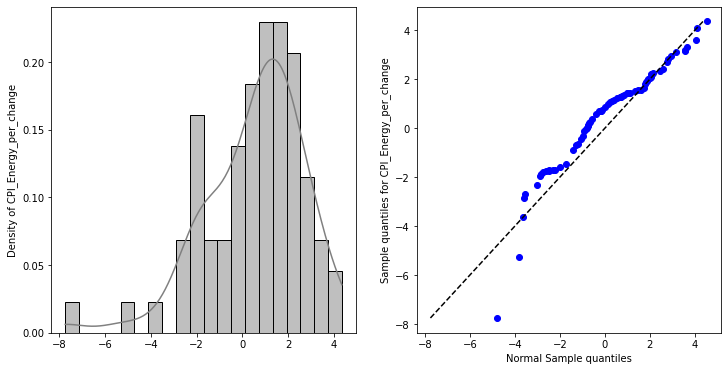

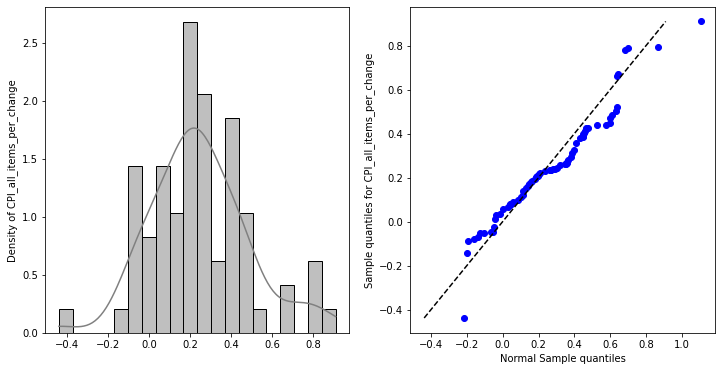

In [18]:
def plot_q_q(df,columns,year_range):
    ndf = df.copy(deep = True)
    ndf = ndf[(ndf['DATE'] >= year_range[0]) & (ndf['DATE'] <= year_range[1])]
    
    for column in columns:
        sample  = ndf[column].to_numpy()
        sample_size = len(sample)
        sample_sorted = np.sort(sample)
        mu = sample.mean()
        sigma = np.sqrt(sample.var())
        normal_sample  = np.random.normal(mu, sigma, sample_size)
        normal_sample_sorted  = np.sort(normal_sample)
        
        p = np.arange(1, sample_size+1) / sample_size
        q1 = np.quantile(sample_sorted, p)
        q2 = np.quantile(normal_sample_sorted, p)
        #q3 = np.quantile(sample3_sorted, p)

# Plot Q-Q plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
        sns.histplot(q1, ax=ax1, bins=20, kde=True, stat="density",color='gray')
        ax1.set_ylabel('Density of {}'.format(column))
        ax2.scatter(q2, q1,color='blue')
        ax2.plot([q1.min(), q1.max()], [q1.min(), q1.max()], '--', color='black')
        ax2.set_ylabel('Sample quantiles for ' + column)
        ax2.set_xlabel('Normal Sample quantiles')
        plt.show()
        
df = getInterpolatedDf()       
ndf = calculate_percentage_change(df)
plot_q_q(ndf,['CPI_Energy_per_change','CPI_all_items_per_change'],['2016-01-01','2021-12-31'])

**The Q-Q plots above differ signnificantly from the straight line which is QQ plot for normal distribution.
Since the plot wobbles around it, we cannot say that the data is normally distributed.**

### Shapiro-Wilks Test

  - In this part the we perform Shapiro-Wilk Test on the data samples for columns **'CPI_Energy_per_change','CPI_all_items_per_change' ** 
  - The statistic value and the corresponding p-value is printed as output, and a p-value threshold of 0.05 is assumed to reject the null that the distribution of sample conforms to a normal distribution 

In [19]:
def wilks_test(df,columns,year_range):
    

    # perform Shapiro-Wilk test on the samples
    ndf = df.copy(deep = True)
    ndf = ndf[(ndf['DATE'] >= year_range[0]) & (ndf['DATE'] <= year_range[1])]
    for column in columns:
        sample  = ndf[column].to_numpy()
        sample_size = len(sample)
        mu = sample.mean()
        sigma = np.sqrt(sample.var())
        stat, p = shapiro(sample)
        

    # print the test statistic and p-value
        print("Shapiro-Wilk test statistic for column {}: {}".format(column,stat))
        print("p-value: {}".format(p))
        if p < 0.05:
            print("We reject the null hypothesis that data in column {} is Normally distributed".format(column))
        else:
            print("We Accept the null hypothesis that data in column {} is Normally distributed".format(column))
        print()

df = getInterpolatedDf()       
ndf = calculate_percentage_change(df)
        
wilks_test(ndf,['CPI_Energy_per_change','CPI_all_items_per_change'],['2016-01-01','2021-12-31'])















Shapiro-Wilk test statistic for column CPI_Energy_per_change: 0.9026271104812622
p-value: 3.9051617932273075e-05
We reject the null hypothesis that data in column CPI_Energy_per_change is Normally distributed

Shapiro-Wilk test statistic for column CPI_all_items_per_change: 0.9467869997024536
p-value: 0.004218805581331253
We reject the null hypothesis that data in column CPI_all_items_per_change is Normally distributed



## 3.5.4

## Linear Regression

  - For this task we implement, linear regression from scratch, the method linear regression takes: 
     * DataFrame df with all the values.
     * y_column: the column which has to be predicted.
     * x_columns: the columns to use as features
  - The y_columna dn x_column are converted to a numpy matrix.
  - Then numpy's 'linalg' is used to compute the weights vector $$\beta$$, through the equation
   $$\beta = (X^{T}X)^{-1}X^{T}Y$$
  - Then a vector of all predicted values is obtained by $$y\_predicted = X\beta$$.
  - SSE is obtained by subtracting **y_column values with y_predcited** values and taking the sum of squares.
  - Following which the predicted values and true values are plotted against each feature for each linear regression excercise.













SSE for regression with columns ['US_Dollar_Purchasing_power_per_change'] is : 9.142870478766136

SSE for regression with columns ['US_Dollar_Purchasing_power_per_change', 'CPI_Energy_per_change'] is : 8.73369436766577

SSE for regression with columns ['US_Dollar_Purchasing_power_per_change', 'CPI_Energy_per_change', 'Monthly_Housing_Cost_per_change'] is : 8.733690641860848

SSE for regression with columns ['US_Dollar_Purchasing_power_per_change', 'CPI_Energy_per_change', 'Monthly_Housing_Cost_per_change', 'Rent_of_Primary_residence_per_change'] is : 8.527945774305293



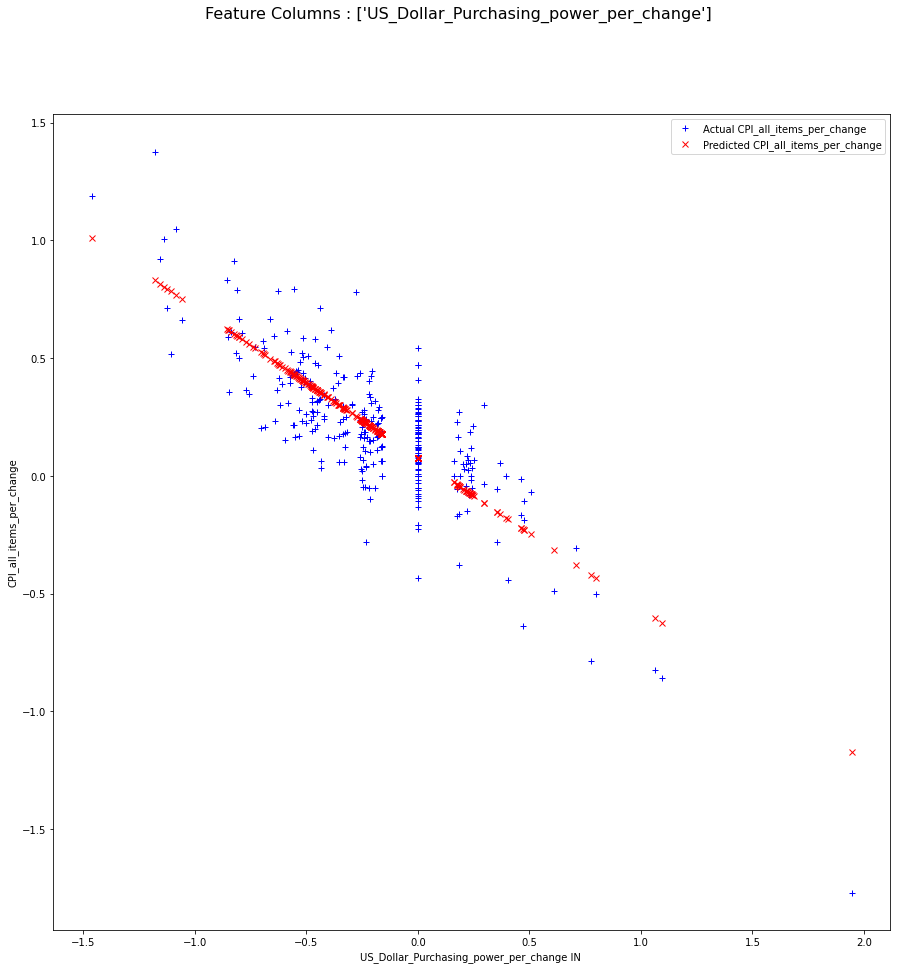

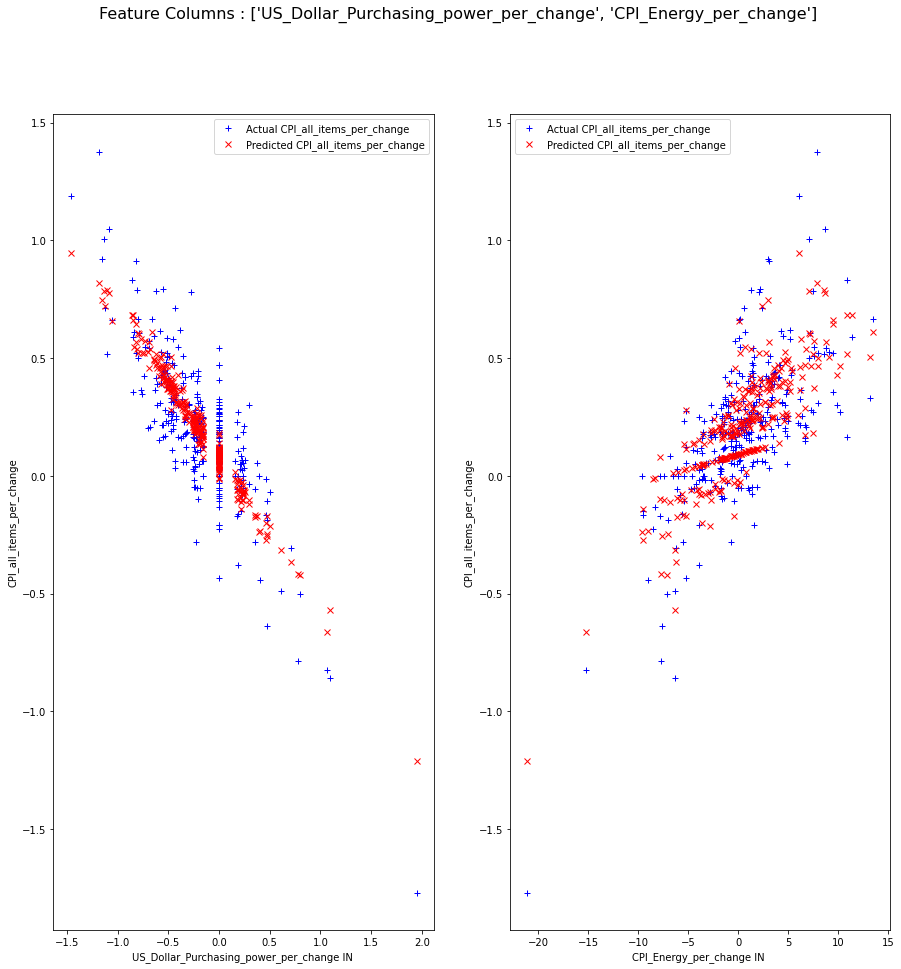

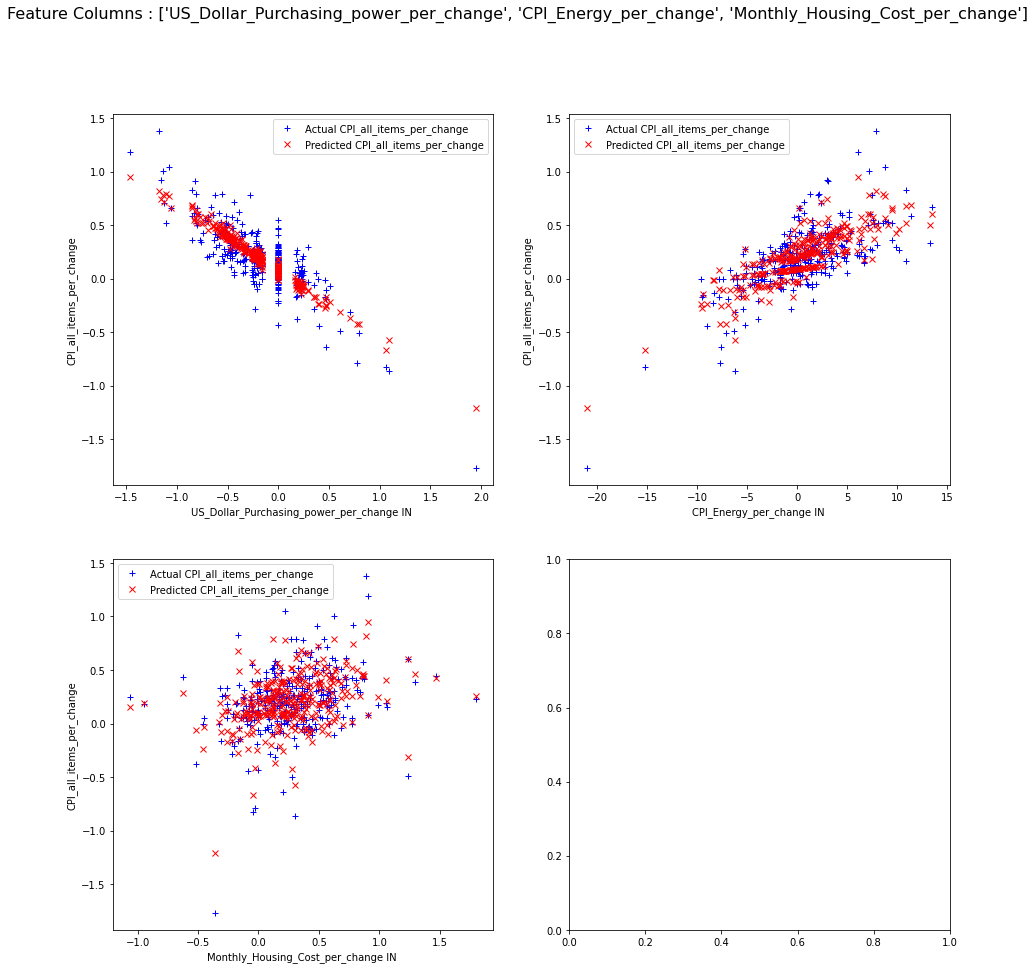

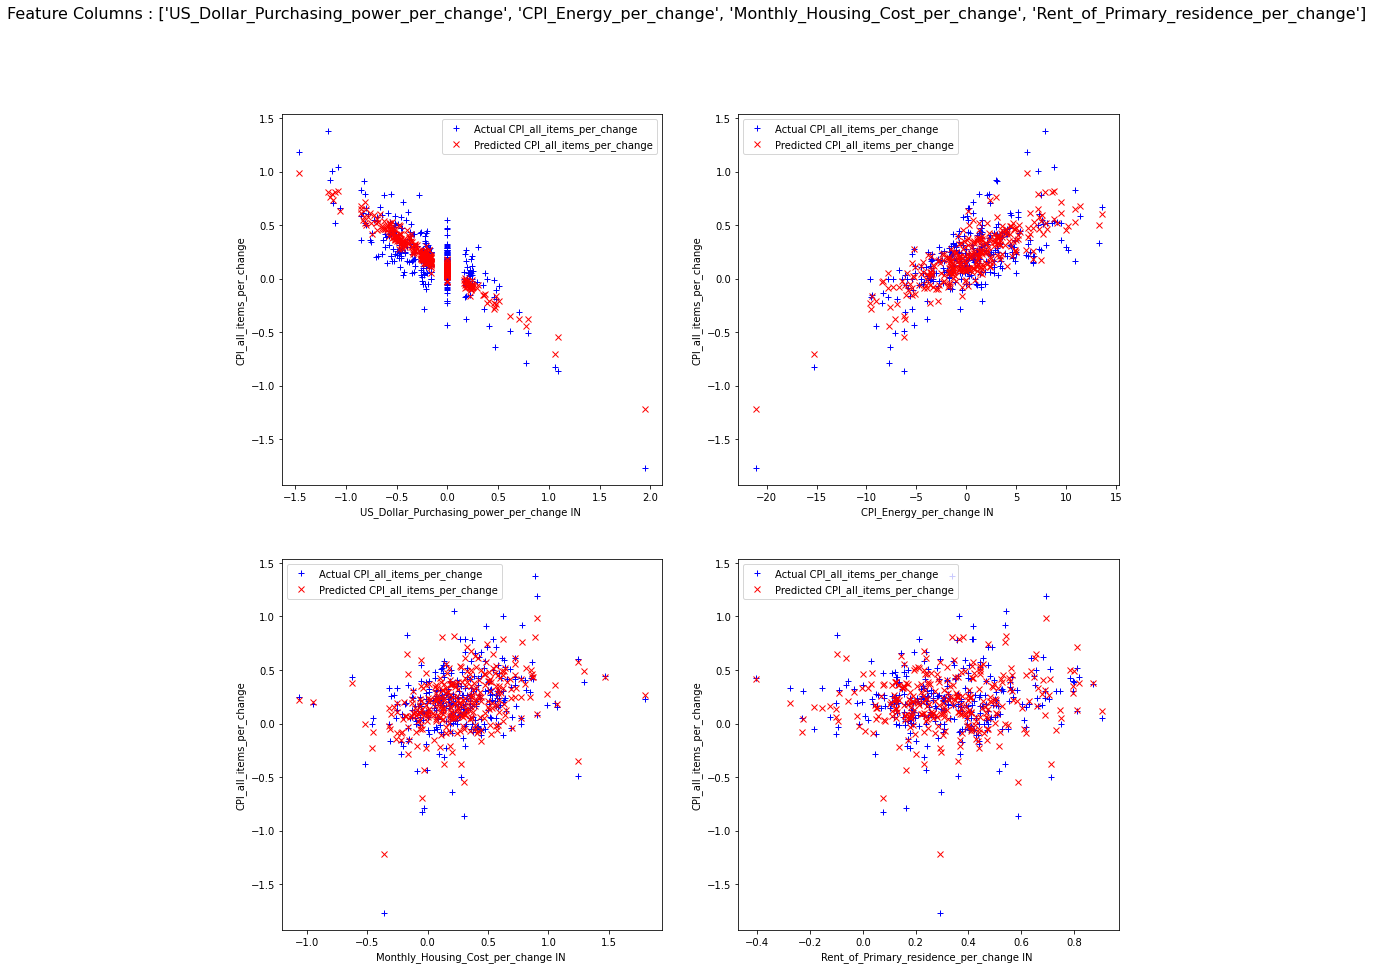

In [20]:
def linear_regression(df,y_column,x_columns):
    nY = df[y_column].to_numpy()
    #print(x_columns)
    nX = df[x_columns].to_numpy()

    weights = np.matmul(np.linalg.inv(np.matmul(nX.transpose(),nX)),np.matmul(nX.transpose(),nY))
    y_predicts = np.matmul(nX,weights)
    sse = ((nY-y_predicts)**2).sum()
    
    num_columns = 1 if (len(x_columns)-1) < 2 else 2
    num_rows = math.ceil((len(x_columns)-1)/2)
     
    
    fig,axs = plt.subplots(num_rows,num_columns,figsize=(15, 15),squeeze=False)
    i=0
    j=0
    #print("------------------------------------------------------------------------------------")
    #print("Plots for columns: Y {} and X {}".format(y_column,x_columns))
    fig.suptitle('Feature Columns : {}'.format(x_columns[1:]), fontsize=16)
    
    for column in x_columns:
            X = df[column].to_numpy()
            if(column != 'ones'):
                #print(max(X), min(X))
                axs[i][j].plot(X,nY,'b+',label = 'Actual {}'.format(y_column))
                axs[i][j].plot(X,y_predicts,'rx', label = 'Predicted {}'.format(y_column))
                axs[i][j].legend()
                #plt.xlim(right = max(X)+1,left = min(X)-1)
                axs[i][j].set_xlabel('{} IN {}'.format(column,""))
                axs[i][j].set_ylabel(y_column)
            
                j+=1
                if j > 1:
                    j=0
                    i+=1
    return sse,weights

df = getInterpolatedDf()       
ndf = calculate_percentage_change(df)
y_column = 'CPI_all_items_per_change'
x_columns = ['US_Dollar_Purchasing_power_per_change', 'CPI_Energy_per_change', 'Monthly_Housing_Cost_per_change','Rent_of_Primary_residence_per_change']
#display(ndf)

for i in range(len(x_columns)):
    nx_columns = x_columns[:i+1]
    nx_columns.insert(0,'ones')
    ndf['ones'] = pd.Series([1 for x in range(len(df.index))])
    sse,weights = linear_regression(ndf,y_column,nx_columns)
    print("SSE for regression with columns {} is : {}".format(nx_columns[1:],sse))
    print()

# 3.6

- We divide the data into two parts
    - train: Years 2018,2019,2020
    - test: Year 2021

- We predict the column CPI_all_items
    - AR(p) -- p is the regression parameter
        - Training data differs for every prediction, for predicting $\hat{y_t}$ we train on all the previous points (i.e $y_{1+p}$,$y_{2+p}$...$y_{t-1}$)
        - For AR(3) - $\hat{y_{t+1}} = \beta_0 + \beta_1*y_t + \beta_2*y_{t-1} + \beta_3*y_{t-2}$
        - Using AR(1) - $\hat{y_{t+1}} = \beta_0 + \beta_1*y_t$
    - EWMA($\alpha$)
        -  EWMA($\alpha=0.5$) = $\hat{y_{t+1}} = 0.5 * y_{t} + 0.5*\hat{y_t}$
        -  EWMA($\alpha=0.0.8$) = $\hat{y_{t+1}} = 0.8 * y_{t} + 0.2*\hat{y_t}$

In [21]:
df = getInterpolatedDf()

In [22]:
def make_data(B,p):
    features = []
    Y = []
    for i in range(p,len(B)):
        #print(i,i+p)
        if i+p <= len(B):
            c = list(B[i-p:i])
            c.insert(0,1)
            features.append(c)
            Y.append(B[i])

    return np.array(Y),np.array(features[:len(Y)])
def make_test_data(B,p):
    features = []
    Y = []
    for i in range(0,len(B)):
        #print(i,i+p)
        if i+p <= len(B):
            c = list(B[i:i+p])
            c.insert(0,1)
            features.append(c)
        if i+p < len(B):
            Y.append(B[i+p])

    return np.array(Y),np.array(features[:len(Y)])


In [23]:
Y_training = df[(df['DATE'].dt.year >=2018) & (df['DATE'].dt.year <= 2020) ]
Y_test = df[df['DATE'].dt.year == 2021]

Y = pd.concat([Y_training,Y_test])['CPI_all_items']
X = pd.concat([Y_training,Y_test])['DATE']
Y.reset_index(drop=True,inplace=True)
X.reset_index(drop=True,inplace=True)

In [24]:
train_size = len(Y_training)
Y_training = Y[:train_size]
Y_test = Y[train_size:]
Y_test.reset_index(drop=True, inplace=True)

def regress_predict(Y_train, Y_tst,p):
    #print(len(Y_training))
    Y_predicted = np.array([])
    mape = 0
    mse = 0
    count = 0
    for po in Y_tst:
        #print(len(Y_train))
        tx = list(Y_train[-p:])
        tx.insert(0,1)
        Y_train = np.append(Y_train,po)
        nY,nX = make_data(Y_train,p)
        weights = np.matmul(np.linalg.inv(np.matmul(nX.transpose(),nX)),np.matmul(nX.transpose(),nY))

        y_predict = np.matmul(tx,weights)

        Y_predicted = np.append(Y_predicted,y_predict)

        mape+= abs(y_predict - po)/po
        mse += ((y_predict - po)**2)
        count += 1

    mape = (mape*100)/count
    mse = mse/count
    print(f"Mape error : {mape} %, MSE: {mse}")
    #print(Y_predicted)
    return Y_predicted



## 3.6.1 
### AR(3)

Mape error : 0.19899176511405137 %, MSE: 0.4231882540610492


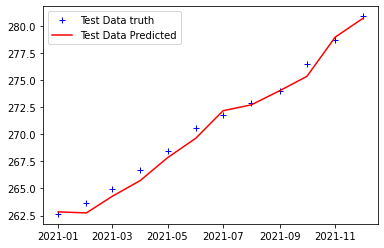

In [25]:
Y_predicted = regress_predict(Y_training[:],Y_test[:],3)
plt.plot(X[train_size:],Y_test,'b+',label = 'Test Data truth')
plt.plot(X[train_size:],Y_predicted,color='red', label = 'Test Data Predicted')
plt.legend()
plt.show()

### 2. AR(5)

Mape error : 0.2226941289334173 %, MSE: 0.5380108001924049


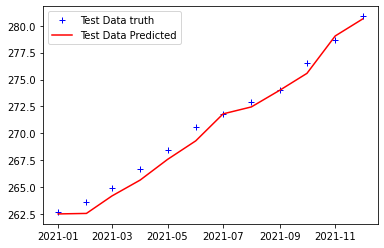

In [26]:
Y_predicted = regress_predict(Y_training[:],Y_test[:],5)
plt.plot(X[train_size:],Y_test,'b+',label = 'Test Data truth')
plt.plot(X[train_size:],Y_predicted,color='red', label = 'Test Data Predicted')
plt.legend()
plt.show()

In [27]:
# Function to calculate EWMA
def compute_EWMA(Y_training,Y_test,alpha):
    Y_estimate =[Y_training.iloc[-1]]
    mape = 0
    mse = 0
    count = 0
    for i in range(1,len(Y_test)):
        predicted = alpha*Y_test[i-1] + (1-alpha)*Y_estimate[i-1]
        Y_estimate.append(predicted)
        mape+= abs(predicted - Y_test[i])/Y_test[i]
        mse += ((predicted - Y_test[i])**2)
        count += 1

    mape = (mape*100)/count
    mse = mse/count
    print(f"Mape error : {mape} %, MSE: {mse}")

    return Y_estimate


### 3. EWMA with α = 0.5

Mape error : 1.0955311188100343 %, MSE: 9.677348515624784


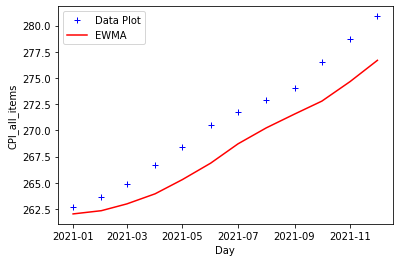

In [28]:

y_ewma = compute_EWMA(Y_training[:],Y_test[:],0.5)
plt.plot(X[len(Y_training):],Y_test,'b+',label='Data Plot')
plt.plot(X[len(Y_training):],y_ewma,color='red',label='EWMA')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CPI_all_items')
plt.show()

### 4. EWMA with α = 0.8

Mape error : 0.7425117672107877 %, MSE: 4.4403986783154


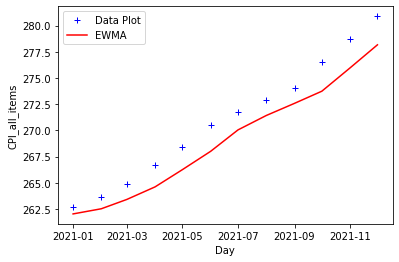

In [29]:
y_ewma = compute_EWMA(Y_training[:],Y_test[:],0.8)
plt.plot(X[len(Y_training):],Y_test,'b+',label='Data Plot')
plt.plot(X[len(Y_training):],y_ewma,color='red',label='EWMA')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CPI_all_items')
plt.show()

# 3.7

## Chi - Square Test for Independence

   - In this test we take two columns **Monthly_Housing_Cost,CPI_all_items** and check if they are independent.
   - We take the raw dataset and instead of interpolating Null values we will them with yearly average.
   - fill_value() function takes the data as a dataframe, columns to use and calculates the yearly average.
       * then we find null values in every column ad fill it with the column average.
   - We use chi_square method to map the column values to 'hig' and 'low'.
   - Create matrix method makes a matrix to perform Chi square test, with columns names as index and High and Low counts for each colum.
   - An expected matrix in built by taking the formula : $$e_{rc} = \frac{row\_total_{r}*column\_total_{c}}{total}$$.
   - in Chi Square method we calculate the chi-square statistics as $$Q_{obs} = \sum_{r}\sum_{c} \frac{(e_{rc}-o_{rc})^{2}}{e_{rc}}$$

In [30]:
# Creating dataset for Chi Square test, removing outliers and filling NaN values with yearly average

df = getOriginalDataset()
df['DATE'] = pd.to_datetime(df['DATE'])
for column in df.columns:
    outliers = find_outliers(df, column,debug=False)
first_values= ['1997-01-01', 159.400 , 164.400, 155.100 , 115.200 , 62.8]
last_values = ['2022-12-01', 298.900, 385.649, 310.725, 287.176, 33.7]

update_row(df, first_values, last_values,debug = False)
linear_interpolation(df,debug=False)
df['year'] = df['DATE'].dt.year
df['month'] = df['DATE'].dt.month

In [31]:


def fill_value(ndf,columns):
    df = ndf.copy(deep=True)
    df['DATE'] = pd.to_datetime(df['DATE'])

# create a new column 'YEAR' to store the year of each date
 

# calculate the year-wise average and store it in a dictionary
    year_avg = {}
    for year in df['year'].unique():
        year_avg[year] = {}
        for column in columns:
            avg = df.loc[df['year'] == year][column].mean(numeric_only=True)
            year_avg[year][column] = avg
    #print(year_avg)
# replace NaN values with year-wise average
    for column in columns:
        for index, row in df.iterrows():
            if pd.isna(row[column]):
                year = row['year']
                avg = year_avg[year][column]
                df.at[index, column] = avg
    
    return pd.DataFrame(df[['DATE']+columns])

ndf = fill_value(df,['Monthly_Housing_Cost','CPI_all_items'])
#display(ndf)

def create_matrix(df,categories):
    mat = {}
    for column in df.columns:
        mat[column] = []
        for cat in categories:
            cat_num = 0
            for i,value in enumerate(df[column]):
                if value == cat:
                    cat_num+=1
            mat[column].append(cat_num)
    df = pd.DataFrame(mat)
    
    df.index = categories
    df = df.transpose()
    total_row = pd.DataFrame(df.sum(axis=0)).T
    total_row.index = ['Column_Total']
    df = df.append(total_row)
    df = df.assign(Row_Total=df.sum(axis=1))
    return df
            
                
        
def chi_square(df,year_range):
    ndf = df.copy(deep = True)
    ndf = ndf[(ndf['DATE'] >= year_range[0]) & (ndf['DATE'] <= year_range[1])]
    for column in df.columns:    
        if column != 'DATE':
            column_median = df[column].median()
            ndf['CAT_'+column] = ['high' if x >= column_median else 'low' for x in ndf[column]]
            #result = ndf.groupby(column)['CAT_'+column].value_counts().unstack().fillna(0)
            ndf = ndf.drop(columns = [column])
    ndf = ndf.drop(columns=['DATE'])
    #ndf = pd.DataFrame(ndf['CAT_'+column for column in columns and column != 'DATE'])
    categories = ['high','low']
    
    print("Original Values")
    mat_df = create_matrix(ndf,categories)
    display(mat_df)
    
    # Expected Matrix
    print("Expected Values")
    ex_mat = {}
    for col in mat_df.columns[:-1]:
        ex_mat[col] = []
        for row in mat_df.index[:-1]:
            ex_val = mat_df.loc[row,mat_df.columns[-1]] * mat_df.loc[mat_df.index[-1],col]/mat_df.loc[mat_df.index[-1],mat_df.columns[-1]]
            ex_mat[col].append(ex_val)
    ex_df = pd.DataFrame(ex_mat)
    ex_df.index = mat_df.index[:-1]
    display(ex_df)
    
    chi_sum = 0
    
    for row in ex_df.index:
        for col in ex_df.columns:
            chi_sum += (ex_df.loc[row,col] - mat_df.loc[row,col])**2/(ex_df.loc[row,col])
    dof = (len(ex_df.index)-1)*(len(ex_df.columns)-1)
    return dof,chi_sum
    
dof,chi_sum = chi_square(ndf,['1997-01-01','2021-12-31'])
print("Chi Sum is {}".format(chi_sum))

print()
print("Since Chi Sum is {} which is less than the threshold we accpept the null that the two distibutions are independent.".format(chi_sum))

Original Values


C:\Users\Dukyoung\AppData\Local\Temp/ipykernel_41440/3467309043.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(total_row)


,high,low,Row_Total
CAT_Monthly_Housing_Cost,144,156,300
CAT_CPI_all_items,144,156,300
Column_Total,288,312,600


Expected Values


,high,low
CAT_Monthly_Housing_Cost,144.0,156.0
CAT_CPI_all_items,144.0,156.0


Chi Sum is 0.0

Since Chi Sum is 0.0 which is less than the threshold we accpept the null that the two distibutions are independent.
